In [1]:
library(Seurat)
# library(SeuratDisk)
library(ggplot2)
library(patchwork)

## load in EUS-FNB

In [2]:
data_dir = "../data/pdac"
# samples = list.files(path = data_dir)
samples = c('wu01', 'wu02', 'wu03', 'wu04', 'wu05', 'wu07', 'wu09', 'wu14', 'wu15', 'wu16', 'wu18', 'wu22',
           'wu23', 'wu24', 'wu25', 'wu26', 'wu27', 'wu28', 'wu29', 'wu30', 'wu31', 'wu32')
fps = c()
for (sample in samples) {
  fps = c(fps, paste(data_dir, sample, sep="/"))   
}
fps

[1] "../data/pdac/wu01" "../data/pdac/wu02" "../data/pdac/wu03"
 [4] "../data/pdac/wu04" "../data/pdac/wu05" "../data/pdac/wu07"
 [7] "../data/pdac/wu09" "../data/pdac/wu14" "../data/pdac/wu15"
[10] "../data/pdac/wu16" "../data/pdac/wu18" "../data/pdac/wu22"
[13] "../data/pdac/wu23" "../data/pdac/wu24" "../data/pdac/wu25"
[16] "../data/pdac/wu26" "../data/pdac/wu27" "../data/pdac/wu28"
[19] "../data/pdac/wu29" "../data/pdac/wu30" "../data/pdac/wu31"
[22] "../data/pdac/wu32"

In [3]:
objs = c()
for (i in 1:length(fps)) {
  print(fps[[i]])
  temp.data = Read10X(data.dir = fps[[i]])
  temp = CreateSeuratObject(counts = temp.data, project = samples[[i]], min.cells = 3, min.features = 200)
  objs = c(objs, temp)
}
pdac_eus <- merge(objs[[1]], y = objs[2:length(objs)], add.cell.ids = samples, project = "pdac_eus")

[1] "../data/pdac/wu01"
[1] "../data/pdac/wu02"
[1] "../data/pdac/wu03"
[1] "../data/pdac/wu04"
[1] "../data/pdac/wu05"
[1] "../data/pdac/wu07"
[1] "../data/pdac/wu09"
[1] "../data/pdac/wu14"
[1] "../data/pdac/wu15"
[1] "../data/pdac/wu16"
[1] "../data/pdac/wu18"
[1] "../data/pdac/wu22"
[1] "../data/pdac/wu23"
[1] "../data/pdac/wu24"
[1] "../data/pdac/wu25"
[1] "../data/pdac/wu26"
[1] "../data/pdac/wu27"
[1] "../data/pdac/wu28"
[1] "../data/pdac/wu29"
[1] "../data/pdac/wu30"
[1] "../data/pdac/wu31"
[1] "../data/pdac/wu32"


In [4]:
pdac_eus[["percent.mt"]] <- PercentageFeatureSet(pdac_eus, pattern = "^MT-")

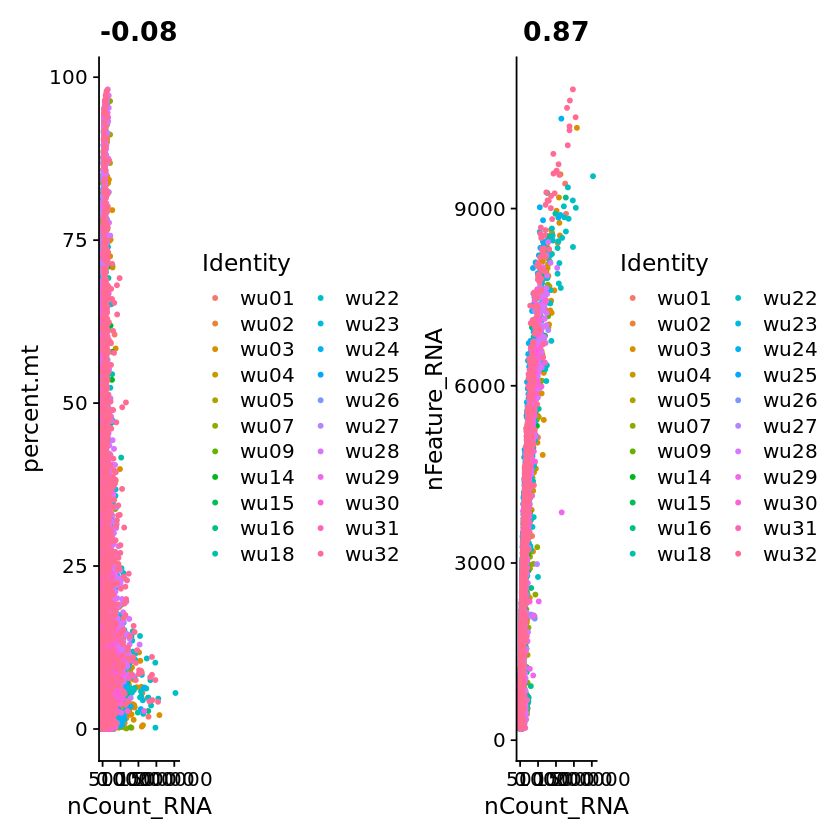

In [5]:
plot1 <- FeatureScatter(pdac_eus, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pdac_eus, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [6]:
pdac_eus <- subset(pdac_eus, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 20)

In [7]:
pdac_eus

An object of class Seurat 
22833 features across 24154 samples within 1 assay 
Active assay: RNA (22833 features, 0 variable features)

## load in reference dataset (HTAN)

In [8]:
data_dir = "../data/pdac"
# samples = list.files(path = data_dir)
samples = c('1555-tumor',
 'H_ZY-1105-07',
 'H_ZY-1160-06',
 'H_ZY-1174-06',
 'TWCE-HT055P-S1PAG',
 'TWCE-HT081P1-XB1')
fps = c()
for (sample in samples) {
  
  fps = c(fps, paste(data_dir, sample, sep="/"))   
  
}
fps

[1] "../data/pdac/1555-tumor"        "../data/pdac/H_ZY-1105-07"     
[3] "../data/pdac/H_ZY-1160-06"      "../data/pdac/H_ZY-1174-06"     
[5] "../data/pdac/TWCE-HT055P-S1PAG" "../data/pdac/TWCE-HT081P1-XB1"

In [9]:
objs = c()
for (i in 1:length(fps)) {
  print(fps[[i]])
  temp.data = Read10X(data.dir = fps[[i]])
  temp = CreateSeuratObject(counts = temp.data, project = samples[[i]], min.cells = 3, min.features = 200)
  objs = c(objs, temp)
}
pdac_htan <- merge(objs[[1]], y = objs[2:length(objs)], add.cell.ids = samples, project = "pdac_htan")

[1] "../data/pdac/1555-tumor"
[1] "../data/pdac/H_ZY-1105-07"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/pdac/H_ZY-1160-06"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/pdac/H_ZY-1174-06"


Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”


[1] "../data/pdac/TWCE-HT055P-S1PAG"
[1] "../data/pdac/TWCE-HT081P1-XB1"


In [10]:
pdac_htan

An object of class Seurat 
26954 features across 34787 samples within 1 assay 
Active assay: RNA (26954 features, 0 variable features)

In [11]:
pdac_htan[["percent.mt"]] <- PercentageFeatureSet(pdac_htan, pattern = "^MT-")

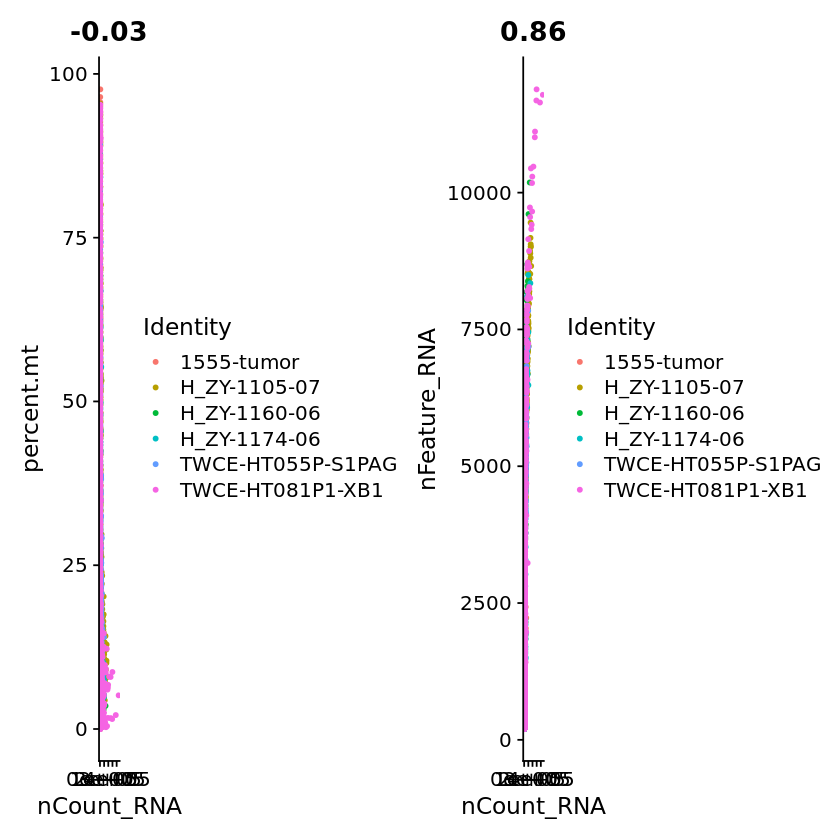

In [12]:
plot1 <- FeatureScatter(pdac_htan, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(pdac_htan, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [13]:
pdac_htan <- subset(pdac_htan, subset = nFeature_RNA > 200 & nFeature_RNA < 7500 & percent.mt < 20)

In [22]:
options(future.globals.maxSize = 20000 * 1024^2)

In [23]:
pancreas.list <- c(pdac_eus, pdac_htan)
for (i in 1:length(pancreas.list)) {
    obj = pancreas.list[[i]]
    pancreas.list[[i]] <- SCTransform(obj, verbose = FALSE)
}

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in sqrt(1/i):
“NaNs produced”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warnin

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):
“iteration limit reached”
Warning message in theta.ml(y = y, mu = fit$fitted):

In [24]:
pancreas.features <- SelectIntegrationFeatures(object.list = pancreas.list, nfeatures = 3000)

In [25]:
pancreas.list <- PrepSCTIntegration(object.list = pancreas.list, anchor.features = pancreas.features, 
    verbose = FALSE)

In [26]:
pancreas.anchors <- FindIntegrationAnchors(object.list = pancreas.list, normalization.method = "SCT", 
    anchor.features = pancreas.features, verbose = FALSE)
pancreas.integrated <- IntegrateData(anchorset = pancreas.anchors, normalization.method = "SCT", 
    verbose = FALSE)

Warning message:
“UNRELIABLE VALUE: Future (‘future_lapply-1’) unexpectedly generated random numbers without specifying argument 'seed'. There is a risk that those random numbers are not statistically sound and the overall results might be invalid. To fix this, specify 'seed=TRUE'. This ensures that proper, parallel-safe random numbers are produced via the L'Ecuyer-CMRG method. To disable this check, use 'seed=NULL', or set option 'future.rng.onMisuse' to "ignore".”


In [27]:
pancreas.integrated <- RunPCA(pancreas.integrated, verbose = FALSE)
pancreas.integrated <- RunUMAP(pancreas.integrated, dims = 1:30)


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
09:40:50 UMAP embedding parameters a = 0.9922 b = 1.112

09:40:52 Read 52848 rows and found 30 numeric columns

09:40:52 Using Annoy for neighbor search, n_neighbors = 30

09:40:52 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

09:41:00 Writing NN index file to temp file /tmp/RtmpcHfHD2/file40fa13fd432d8

09:41:00 Searching Annoy index using 1 thread, search_k = 3000

09:41:27 Annoy recall = 100%

09:41:30 Commencing smooth kNN distance calibration using 1 thread

09:41:38 Initializing f

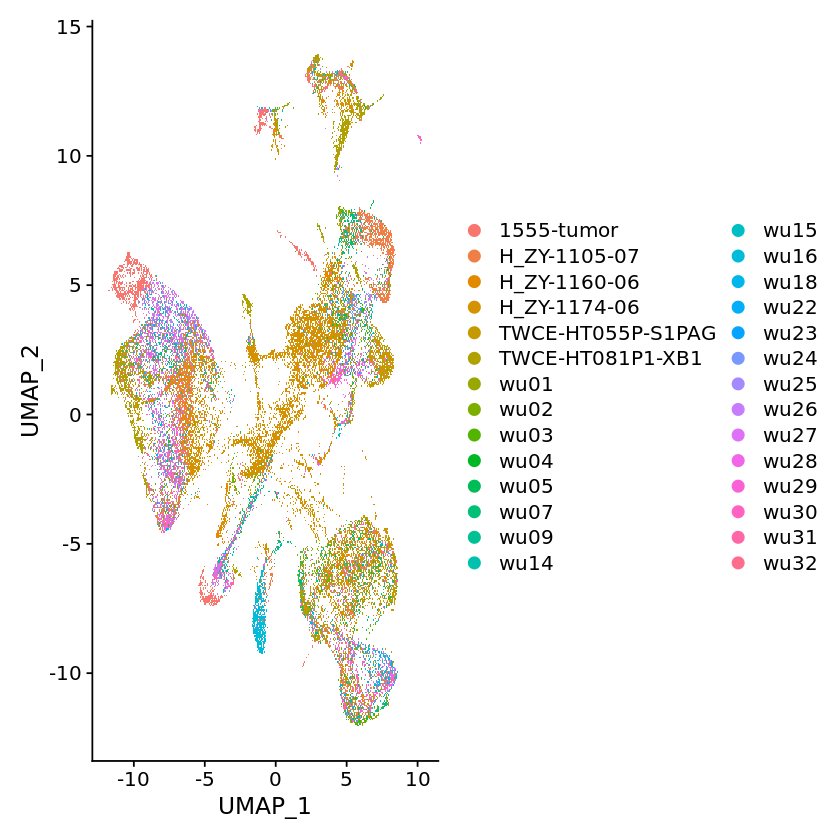

In [28]:
DimPlot(pancreas.integrated)

In [29]:
pancreas.integrated <- FindNeighbors(pancreas.integrated, dims = 1:30)

Computing nearest neighbor graph

Computing SNN



In [30]:
pancreas.integrated <- FindClusters(pancreas.integrated, resolution = 1.,)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 52848
Number of edges: 1860162

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9132
Number of communities: 41
Elapsed time: 14 seconds


In [31]:
saveRDS(pancreas.integrated, 'backup_inhouse.rds')

In [53]:
pancreas.integrated = readRDS('backup_inhouse.rds')

In [32]:
pancreas.integrated

An object of class Seurat 
57326 features across 52848 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

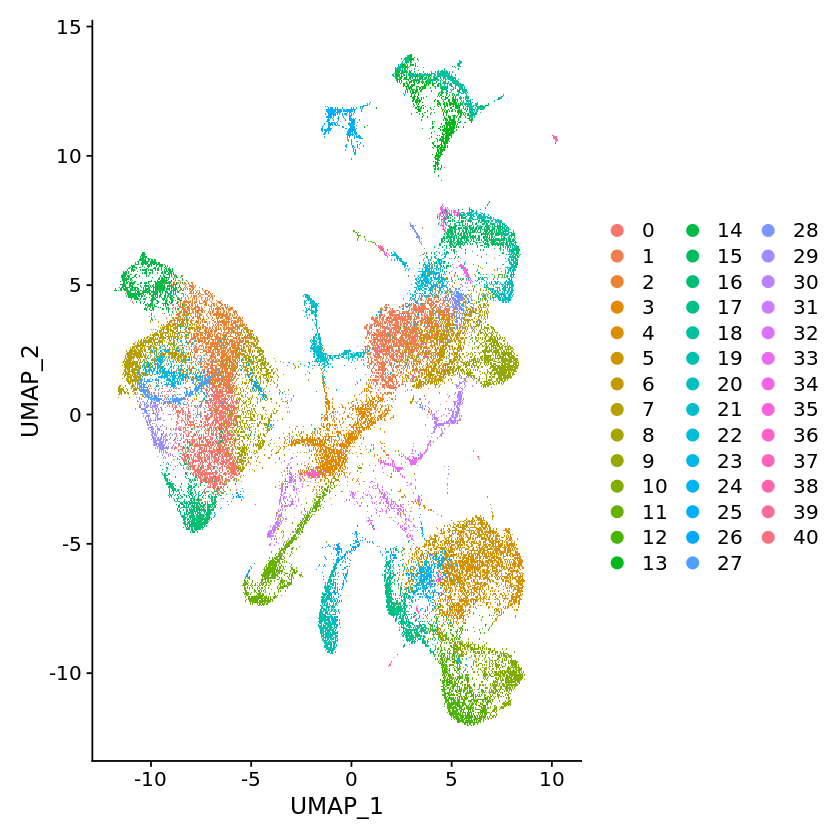

In [33]:
DimPlot(pancreas.integrated, reduction = "umap")

In [34]:
pancreas.integrated@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,integrated_snn_res.1,seurat_clusters
wu01_AAACCTGCACATAACC-1,wu01,11822,3295,14.0162409,3735,1349,12,12
wu01_AAACCTGCACCACGTG-1,wu01,469,293,5.9701493,2464,525,10,10
wu01_AAACCTGTCTAACTTC-1,wu01,482,243,0.0000000,2653,468,22,22
wu01_AAACGGGCAAGGCTCC-1,wu01,1516,717,2.7044855,3164,728,4,4
wu01_AAACGGGTCATTCACT-1,wu01,876,453,7.6484018,2712,554,12,12
wu01_AAACGGGTCTGTGCAA-1,wu01,2064,807,3.6821705,3232,808,4,4
wu01_AAAGCAAAGCCACCTG-1,wu01,554,272,0.7220217,2669,460,13,13
wu01_AAAGTAGAGAACTGTA-1,wu01,4542,1920,9.7974461,4142,1920,16,16
wu01_AAAGTAGGTCGGGTCT-1,wu01,5512,2144,4.4992743,4415,2144,18,18
wu01_AAATGCCTCCCAGGTG-1,wu01,27328,5574,4.7753220,4537,1764,18,18


In [54]:
# new_names = c('0',' 1', '2', '3', '4',
#               '5',' 6', '7', '8', '9',
#               '10','11', '12', '13', '14',
#               '15',' 16', '17', '18', '19',
#              '20','21', '22', '23', '24',
#               '25','26', '27', '28', '29',
#              '30','31', '32', '33', '34',
#               '35','36', '37', '38', '39',
#              '40','41', '42', '43', '44',
#               '45','46', '47', '48', '49',
#              '50','51', '52', '53', '54',
#               '55','56', '57', '58', '59',
#              '60','61', '62', '63', '64',
#              )
new_names = c('CD8.T.cell', 'Malignant', 'CD4.T.cell', 'Plasma', 'Monocyte',
              'Monocyte', 'Malignant', 'CD4.T.cell', 'CD8.T.cell', 'Malignant',
              'Monocyte', 'B.cell', 'Monocyte', 'Fibroblast', 'CD4.T.cell',
              'Malignant', 'NK', 'Dendritic', 'Fibroblast', 'Erythrocyte',
             'Malignant', 'Mast', 'Malignant', 'CD4.T.cell', 'Monocyte',
              'Endothelial', 'Erythrocyte', 'CD4.T.cell', 'Malignant', 'CD8.T.cell',
             'Malignant', 'B.cell', 'Monocyte', 'Acinar', 'Malignant',
              'Plasma', 'Monocyte', 'Malignant', 'Fibroblast', 'Dendritic',
             'Malignant')

# print(length(new_names))
names(new_names) <- levels(pancreas.integrated)

pancreas.integrated <- RenameIdents(pancreas.integrated, new_names)
# names(new_names) <- levels(pdac)
# AddMetaData(pdac, new_names, col.name = 'cell_type')

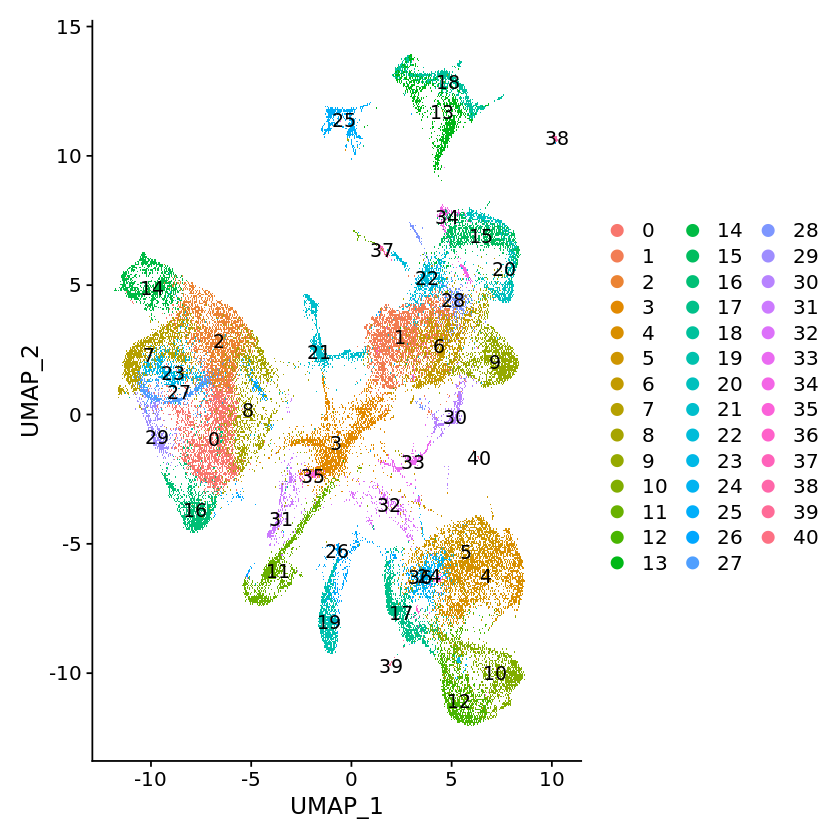

In [39]:
DimPlot(pancreas.integrated, reduction = "umap", label=TRUE)

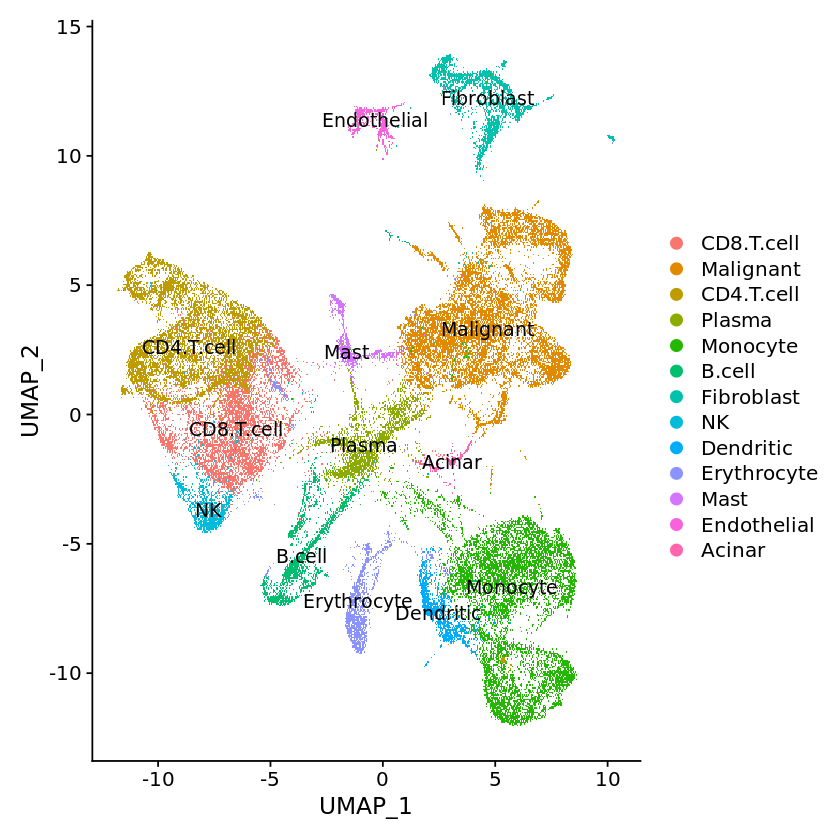

In [55]:
DimPlot(pancreas.integrated, reduction = "umap", label=TRUE)

In [35]:
FeaturePlot(pancreas.integrated, features = c("seurat_clusters"))

ERROR: Error in Summary.factor(structure(c(13L, 11L, 23L, 5L, 13L, 5L, 14L, 17L, : ‘min’ not meaningful for factors


In [56]:
pancreas.integrated@meta.data

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,nCount_SCT,nFeature_SCT,integrated_snn_res.1,seurat_clusters
wu01_AAACCTGCACATAACC-1,wu01,11822,3295,14.0162409,3735,1349,12,12
wu01_AAACCTGCACCACGTG-1,wu01,469,293,5.9701493,2464,525,10,10
wu01_AAACCTGTCTAACTTC-1,wu01,482,243,0.0000000,2653,468,22,22
wu01_AAACGGGCAAGGCTCC-1,wu01,1516,717,2.7044855,3164,728,4,4
wu01_AAACGGGTCATTCACT-1,wu01,876,453,7.6484018,2712,554,12,12
wu01_AAACGGGTCTGTGCAA-1,wu01,2064,807,3.6821705,3232,808,4,4
wu01_AAAGCAAAGCCACCTG-1,wu01,554,272,0.7220217,2669,460,13,13
wu01_AAAGTAGAGAACTGTA-1,wu01,4542,1920,9.7974461,4142,1920,16,16
wu01_AAAGTAGGTCGGGTCT-1,wu01,5512,2144,4.4992743,4415,2144,18,18
wu01_AAATGCCTCCCAGGTG-1,wu01,27328,5574,4.7753220,4537,1764,18,18


In [ ]:
head(unname(pdac@active.ident))

In [57]:
pdac = AddMetaData(pdac, c(pdac@meta.data$orig.ident), col.name = 'sample_id')
pdac = AddMetaData(pdac, unname(pdac@active.ident), col.name = 'cell_type')

ERROR: Error in AddMetaData(pdac, c(pdac@meta.data$orig.ident), col.name = "sample_id"): object 'pdac' not found


In [ ]:
DimPlot(pancreas.integrated, reduction = "umap")

In [58]:
saveRDS(pancreas.integrated, '../data/combined/inhouse_combined_08262021.rds')

In [ ]:
cluster1.markers <- FindMarkers(pancreas.integrated, ident.1 = 44, min.pct = 0.25)
head(cluster1.markers, n = 5)

In [ ]:
pancreas.integrated

In [ ]:
T cells

CD4: CD3G+, CD4+, IL7R+
CD8 - activated: CD3G+, CD8+, GZMA+
CD8 - exausted: CD3G+, LAG3+, PDCD1+
Treg: CD3G+, FOXP3+
NK: NKG7+, NCAM1+, GNLY+

CAF: FAP+, SPARC+
Endothelial: PECAM1+
Stellate: RGS5
Monocyte: CD14, FCGR3A, LYZ
Plasma: SDC1
B cell: MS4A1
Tumor: EPCAM, KRT18, MUC5AC
Erythrocyte: HBA1
Mast: KIT, CPA3
Endocrine CHGB
Acinar: PRSS1, CDH5

Warning message:
“Found the following features in more than one assay, excluding the default. We will not include these in the final dataframe: ENPP3”
Warning message in FetchData(object = object, vars = c(dims, "ident", features), :
“The following requested variables were not found: ENPP3”


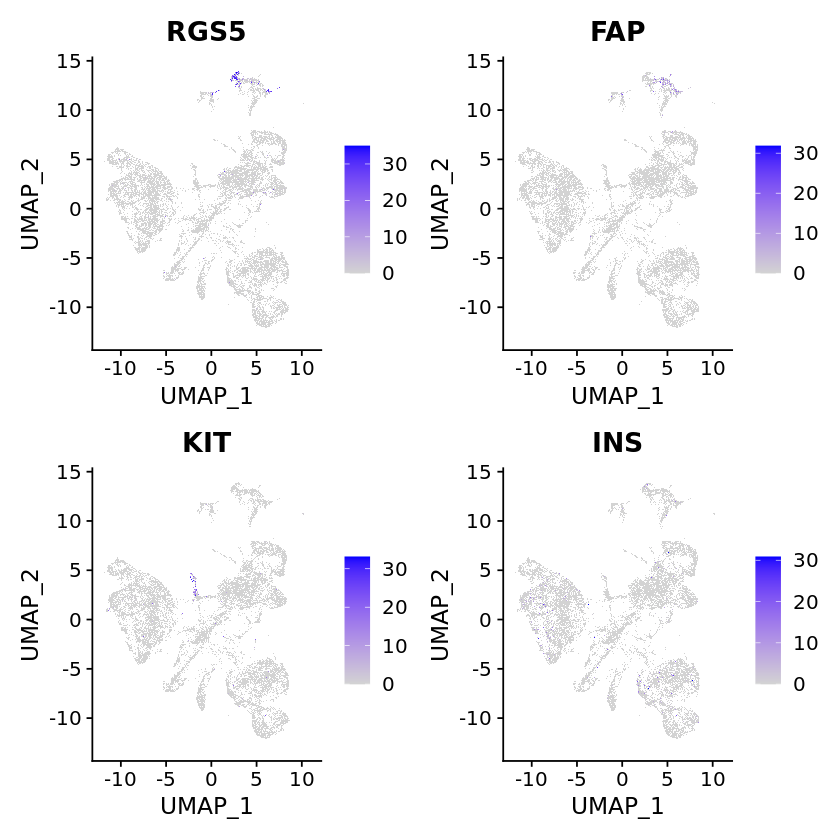

In [36]:
FeaturePlot(pancreas.integrated, features = c("RGS5", "FAP", "KIT", "INS", "ENPP3"), min.cutoff = 0)

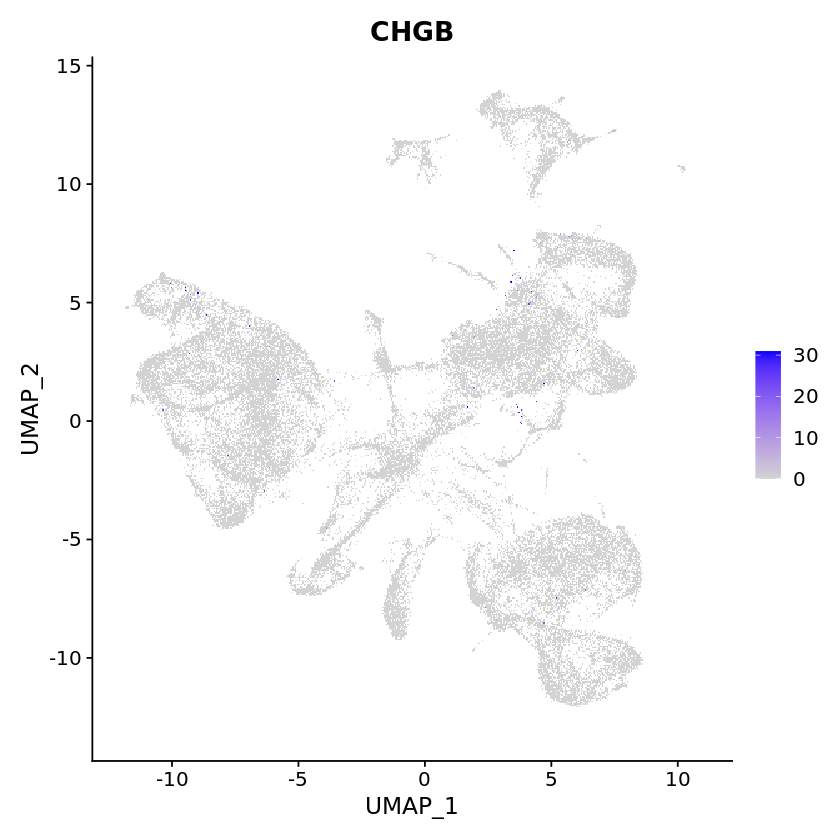

In [37]:
FeaturePlot(pancreas.integrated, features = c("CHGB"), min.cutoff = 0)

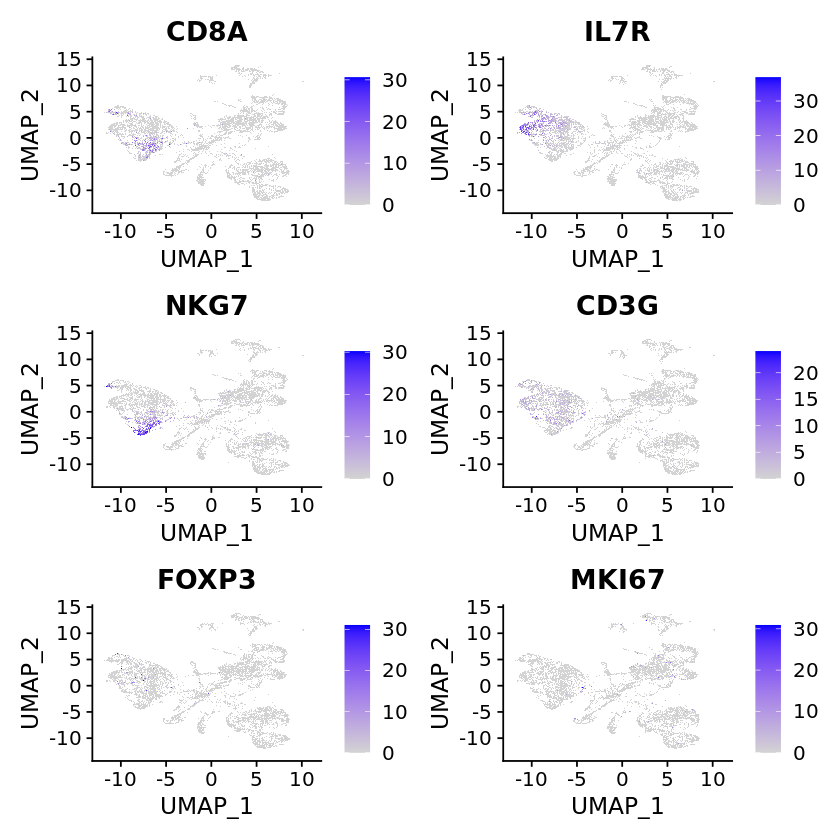

In [41]:
FeaturePlot(pancreas.integrated, features = c("CD8A", "IL7R", "NKG7", "CD3G", "FOXP3", "MKI67"), min.cutoff = 0)

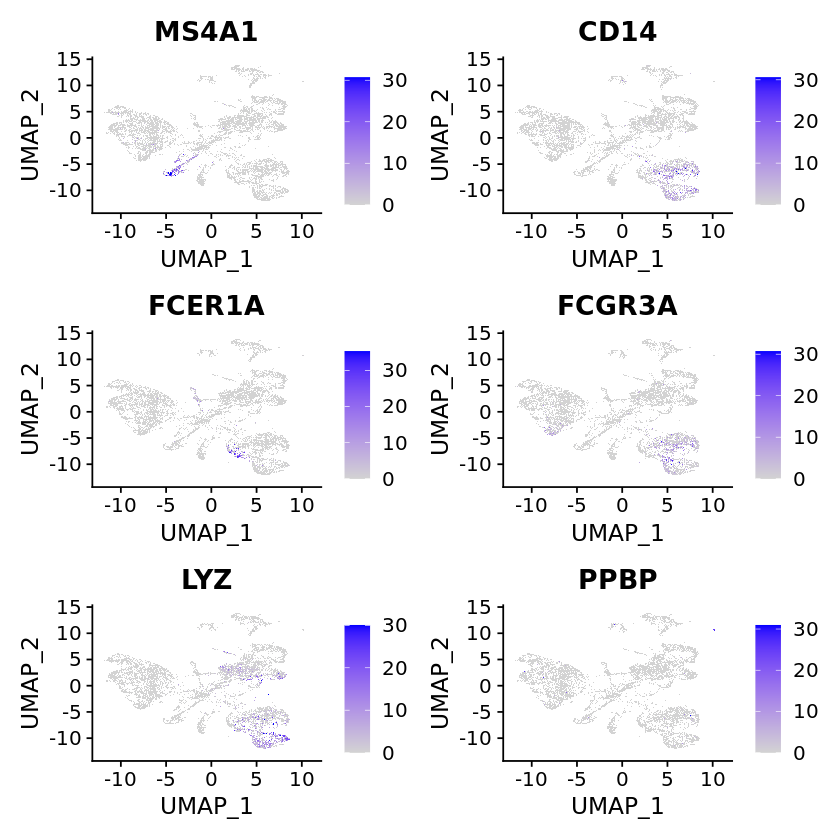

In [43]:
FeaturePlot(pancreas.integrated, features = c("MS4A1", "CD14", "FCER1A", "FCGR3A", "LYZ", "PPBP"), min.cutoff=0)

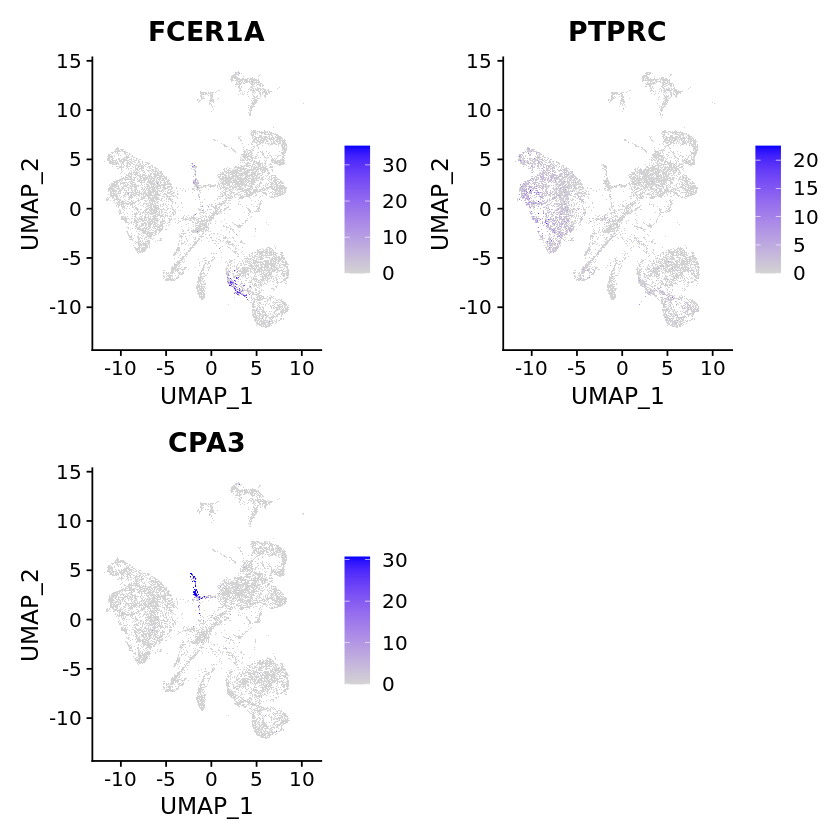

In [44]:
FeaturePlot(pancreas.integrated, features = c("FCER1A", "PTPRC", "CPA3"), min.cutoff=0)

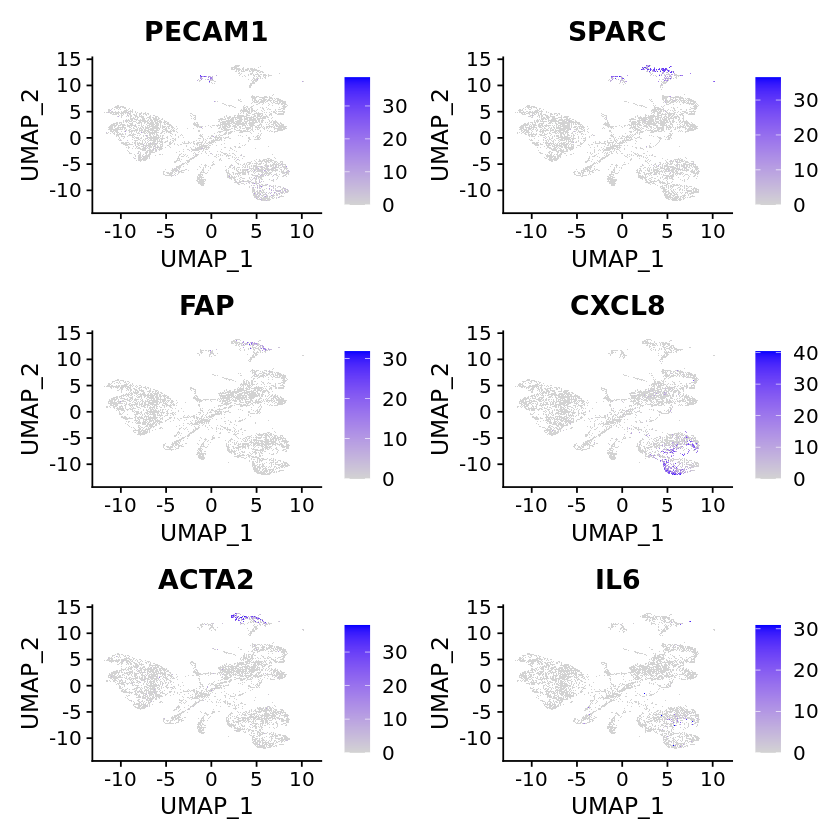

In [45]:
FeaturePlot(pancreas.integrated, features = c("PECAM1", "SPARC", "FAP", "CXCL8", "ACTA2", 'IL6'), min.cutoff=0)

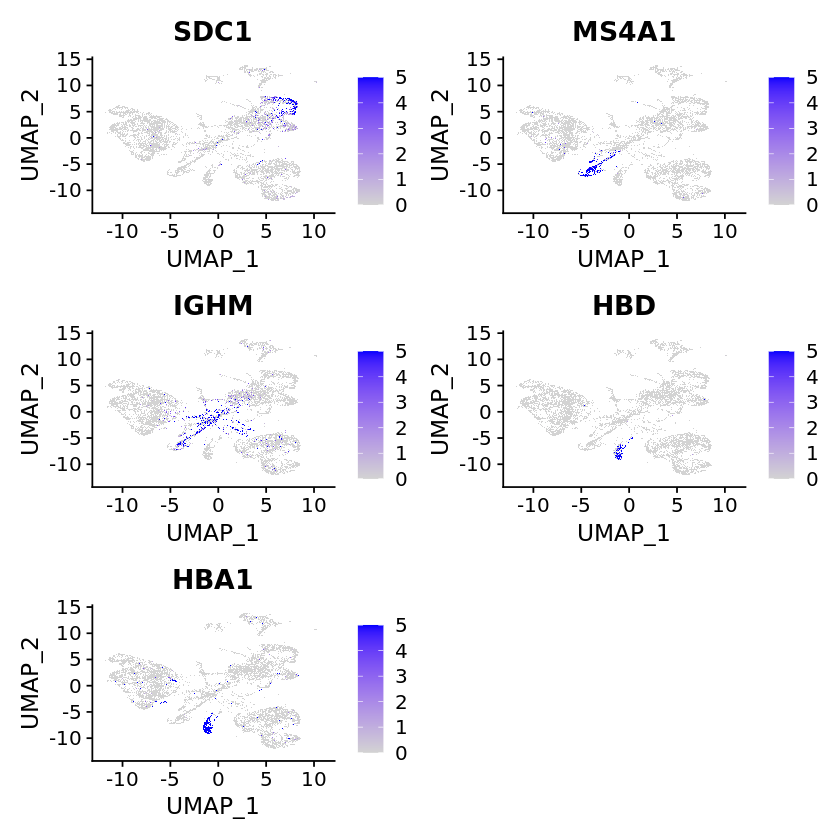

In [46]:
FeaturePlot(pancreas.integrated, features = c("SDC1", "MS4A1", 'IGHM', 'HBD', 'HBA1'), min.cutoff=0, max.cutoff = 5.)

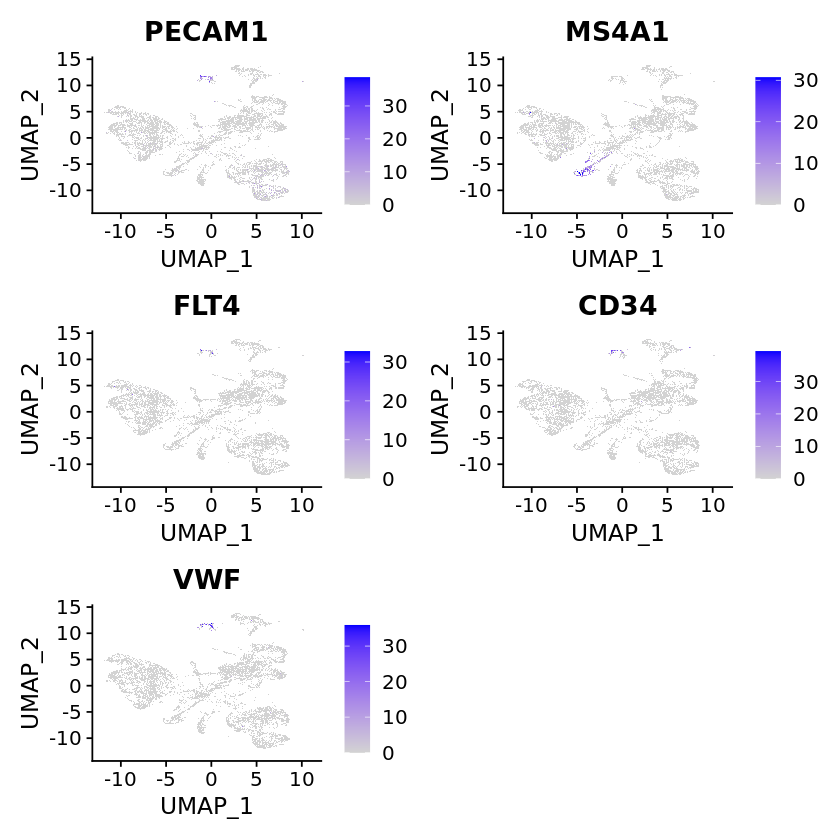

In [47]:
FeaturePlot(pancreas.integrated, features = c("PECAM1", "MS4A1", 'FLT4', 'CD34', 'VWF'), min.cutoff=0)

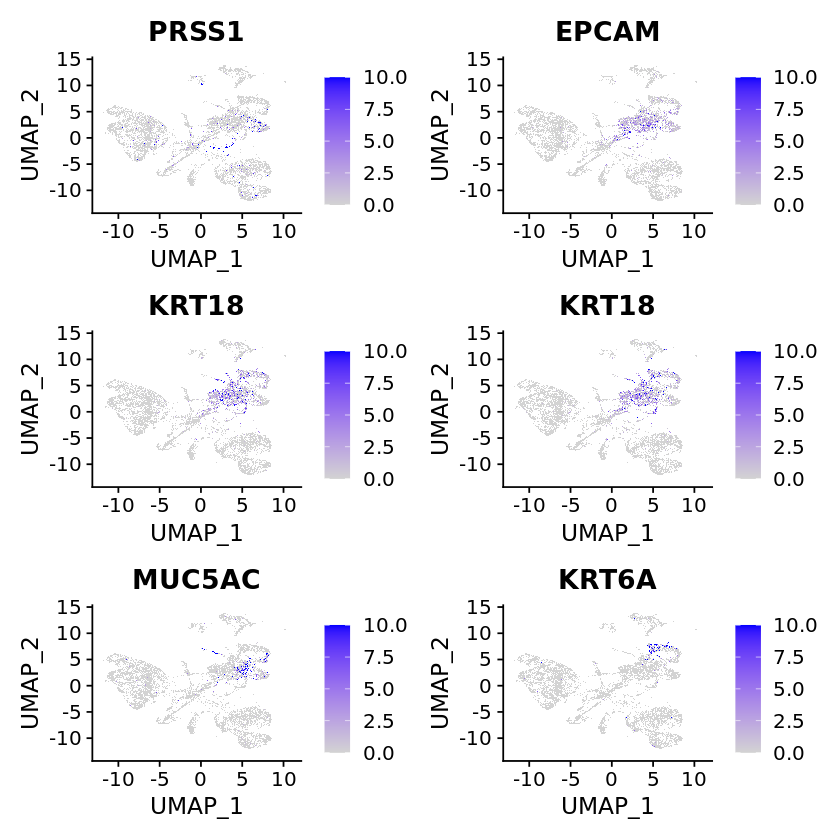

In [49]:
FeaturePlot(pancreas.integrated, features = c("PRSS1", "EPCAM", "KRT18", "KRT18", "MUC5AC", "KRT6A"), min.cutoff=0, max.cutoff = 10.)

###### temp fix for the misnamed cell types

In [105]:
obj = readRDS('../data/combined/all_initial.rds')
obj

An object of class Seurat 
67074 features across 151336 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

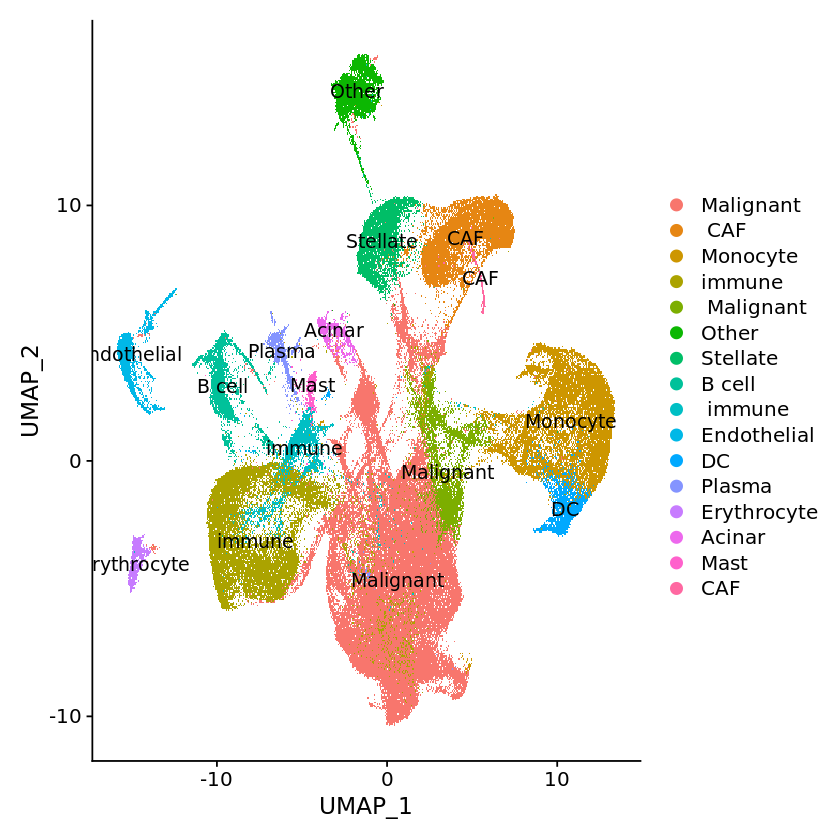

In [106]:
DimPlot(obj, reduction = "umap", label=TRUE)

In [107]:
obj = subset(obj, idents = c("Malignant", " Malignant"))
obj

An object of class Seurat 
67074 features across 67347 samples within 3 assays 
Active assay: integrated (3000 features, 3000 variable features)
 2 other assays present: RNA, SCT
 2 dimensional reductions calculated: pca, umap

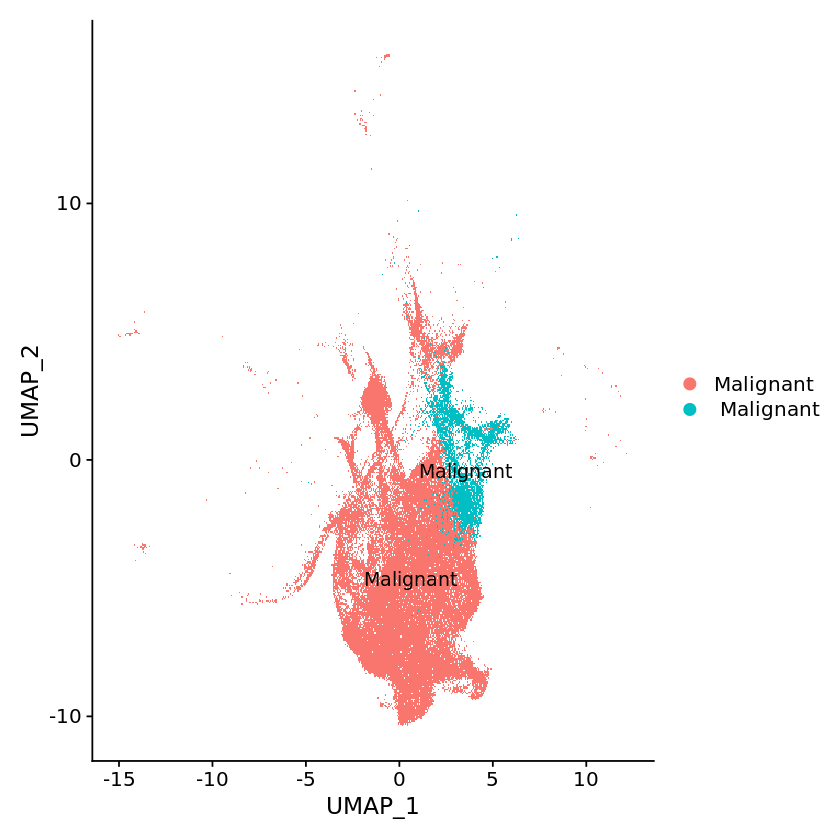

In [108]:
DimPlot(obj, reduction = "umap", label=TRUE)

In [109]:
obj <- RunPCA(obj, verbose = FALSE)
obj <- RunUMAP(obj, dims = 1:30)
obj <- FindNeighbors(obj, dims = 1:30)

15:16:19 UMAP embedding parameters a = 0.9922 b = 1.112

15:16:19 Read 67347 rows and found 30 numeric columns

15:16:19 Using Annoy for neighbor search, n_neighbors = 30

15:16:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

15:16:28 Writing NN index file to temp file /tmp/RtmpHp6tqp/filedc2a1eacaa82

15:16:28 Searching Annoy index using 1 thread, search_k = 3000

15:16:54 Annoy recall = 100%

15:16:55 Commencing smooth kNN distance calibration using 1 thread

15:16:59 Initializing from normalized Laplacian + noise

15:17:04 Commencing optimization for 200 epochs, with 2988016 positive edges

15:18:42 Optimization finished

Computing nearest neighbor graph

Computing SNN



In [110]:
obj <- FindClusters(obj, resolution = .05,)

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 67347
Number of edges: 2430698

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9623
Number of communities: 3
Elapsed time: 17 seconds


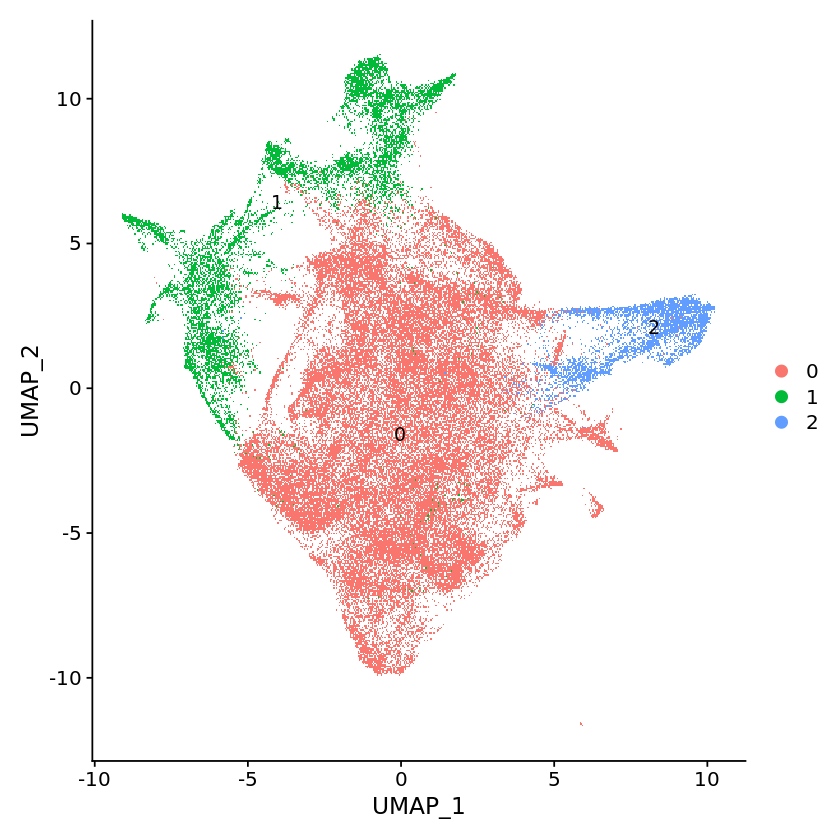

In [111]:
DimPlot(obj, reduction = "umap", label=TRUE)

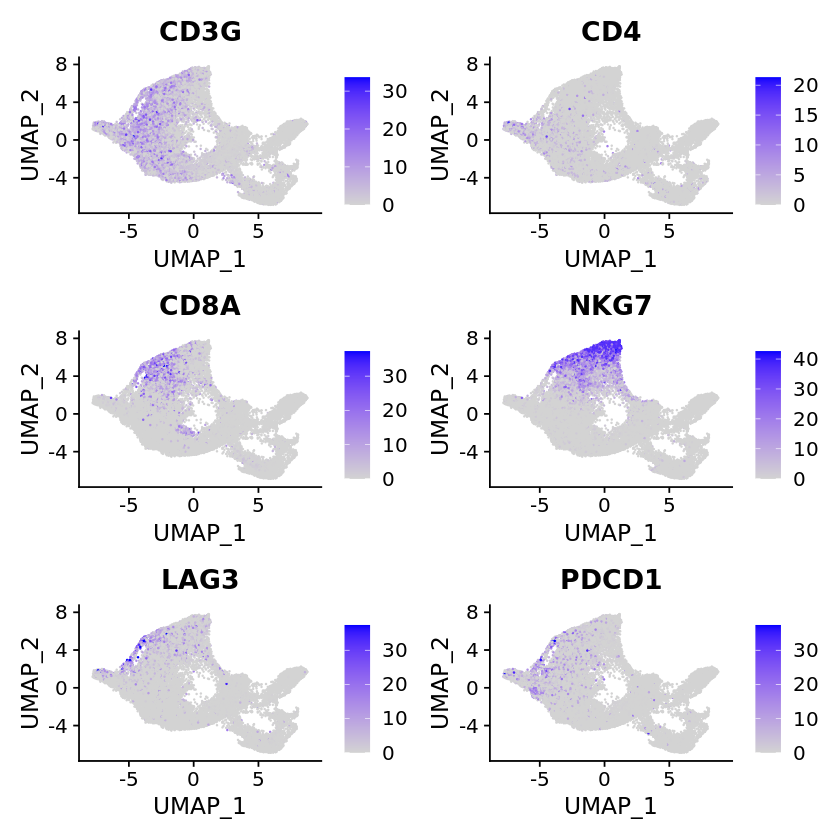

In [98]:
FeaturePlot(obj, features = c('CD3G', 'CD4', 'CD8A', 'NKG7', 'LAG3', 'PDCD1'), min.cutoff=0)

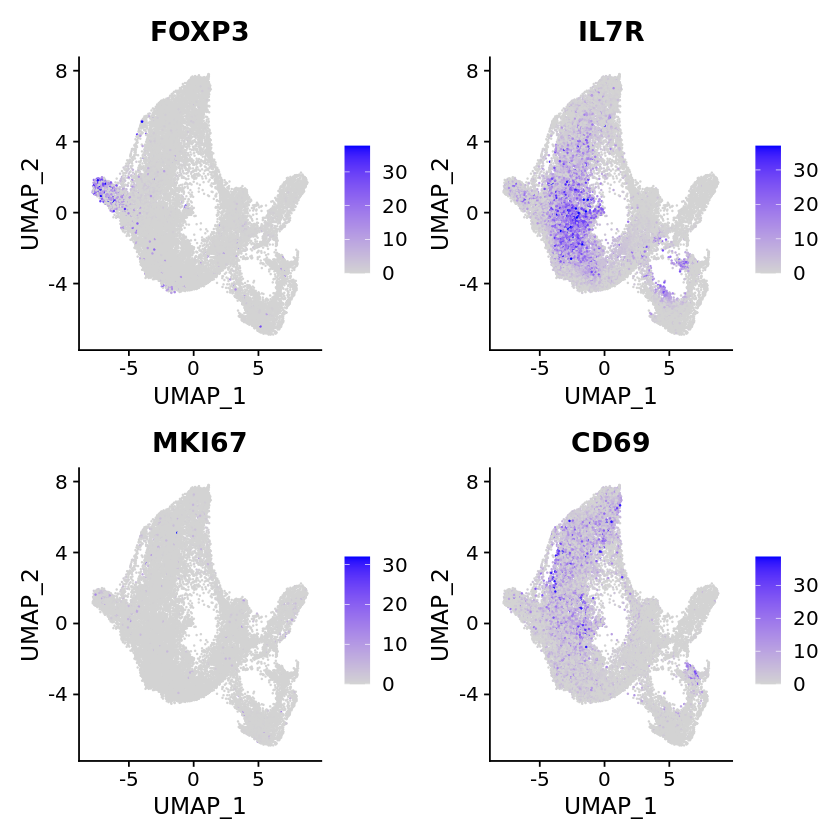

In [102]:
FeaturePlot(obj, features = c('FOXP3', 'IL7R', 'MKI67', 'CD69'), min.cutoff=0)

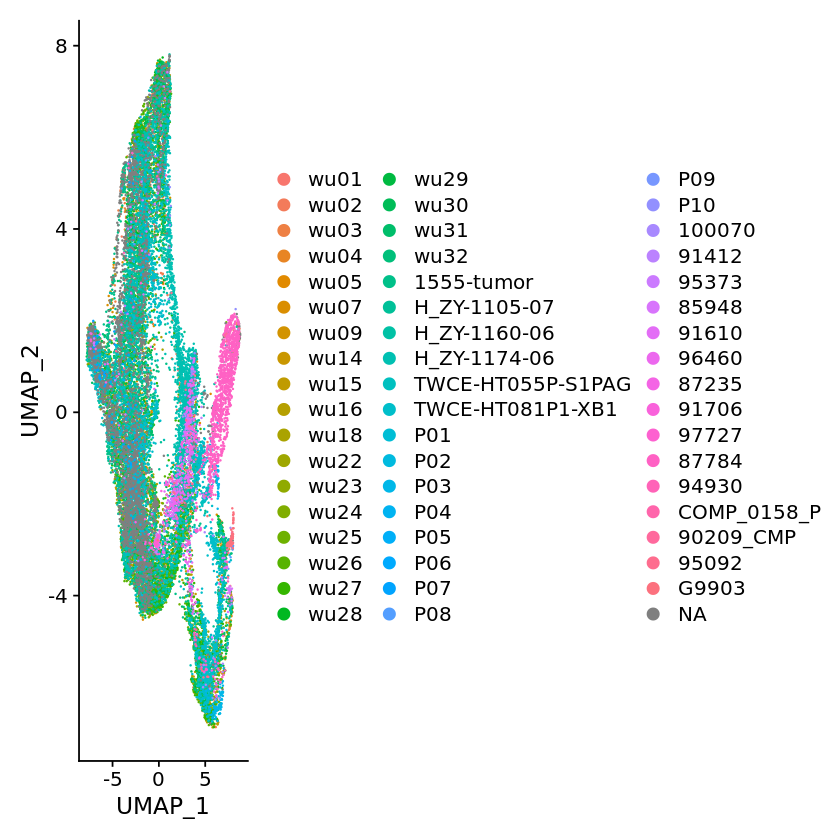

In [103]:
Idents(obj) <- "orig.ident"
DimPlot(obj, reduction = "umap", label=FALSE)

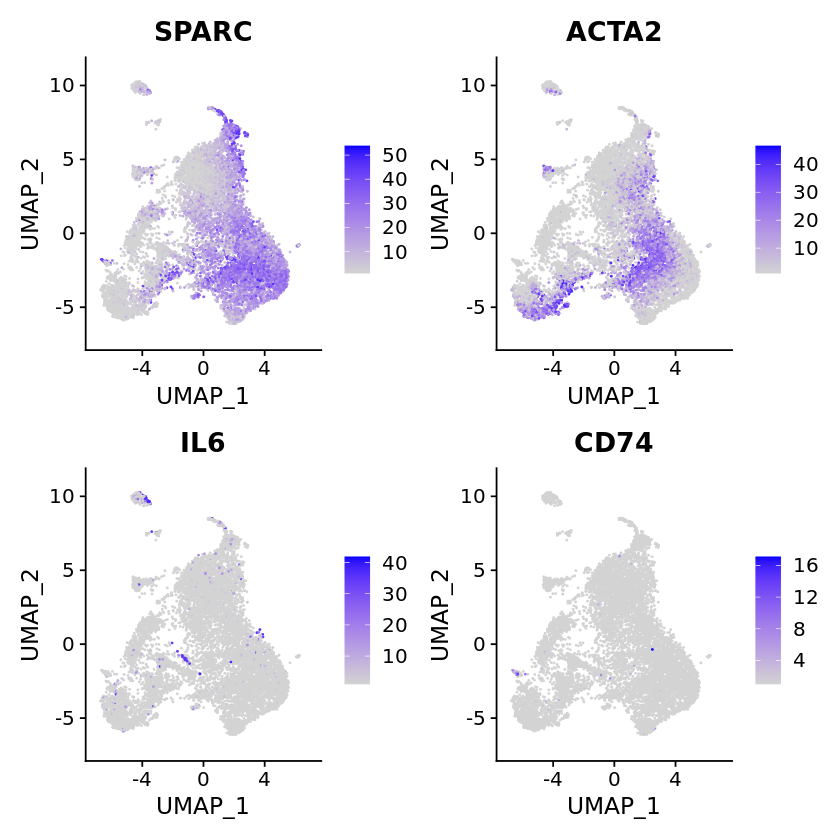

In [79]:
FeaturePlot(obj, features = c("SPARC", 'ACTA2', 'IL6', 'CD74'), min.cutoff = 1)

In [104]:
saveRDS(obj, '../data/combined/all_initial_immune.rds')

ERROR while rich displaying an object: Error: Discrete value supplied to continuous scale

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_text.default(obj)
9. paste(cap

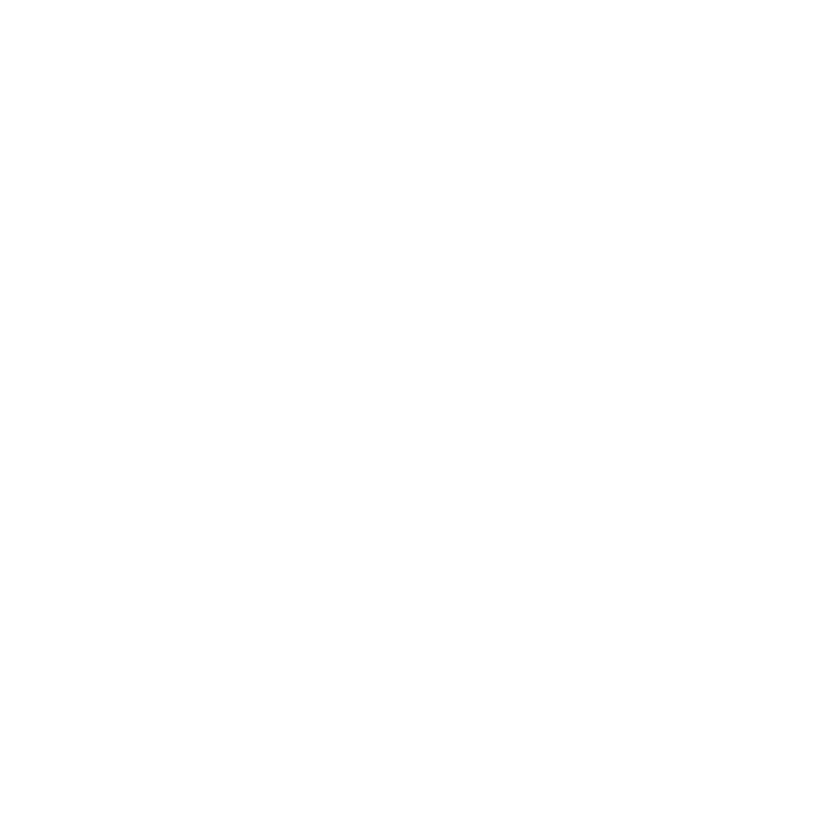

In [18]:
FeaturePlot(obj, features = c("orig.ident"))

In [ ]:
obj$orig.ident

In [93]:
pancreas.integrated@assays$RNA@counts

ERROR: Error in type(pancreas.integrated@assays$RNA@counts): could not find function "type"


#### recluster tumor

In [ ]:
obj = saveRDS(pancreas.integrated, '../data/inhouse_peng_lin.rds')
obj = subset(obj, idents = c("NK", "B"))

## combine with peng

In [ ]:
pdac = readRDS('../data/pdac/processed.rds')
pdac

In [ ]:
counts = read.table('../data/peng/counts.tsv', sep='\t', header=TRUE, row.names=1)
transposed_counts = t(counts)
metadata =  read.table('../data/peng/metadata.tsv', sep='\t', header=TRUE, row.names=1)

In [ ]:
head(metadata)

In [ ]:
head(transposed_counts)

In [ ]:
peng = CreateSeuratObject(
  transposed_counts,
  project = "peng",
  assay = "RNA",
  names.field = "CELL",
#   names.delim = "_",
  meta.data = metadata,

)

In [ ]:
peng

In [ ]:
a = GetAssayData(object=peng, assay = "RNA", slot = "counts")

In [ ]:
peng@meta.data$orig.ident = peng@meta.data$Patient

In [ ]:
Idents(object=peng) <- "Cell_type"

In [ ]:
head(peng@meta.data)

In [ ]:
head(peng@assays$RNA@)

In [ ]:
peng[["percent.mt"]] <- PercentageFeatureSet(peng, pattern = "^MT-")

In [ ]:
plot1 <- FeatureScatter(peng, feature1 = "nCount_RNA", feature2 = "percent.mt")
plot2 <- FeatureScatter(peng, feature1 = "nCount_RNA", feature2 = "nFeature_RNA")
plot1 + plot2

In [ ]:
peng <- SCTransform(peng, vars.to.regress = "percent.mt", verbose = FALSE)

In [ ]:
peng

In [ ]:
pdac

In [ ]:
peng <- RunPCA(peng, features = VariableFeatures(object = peng))
peng <- FindNeighbors(peng, dims = 1:40)
peng <- RunUMAP(peng, dims = 1:40)

In [ ]:
DimPlot(peng, reduction = "umap", group.by = 'Cell_type')

In [ ]:
# ## downsample pdac to try and get a better runtime
# object.downsample <- subset(pdac, downsample = 500)
# object.downsample

In [ ]:
# DimPlot(object.downsample)

In [ ]:
pancreas.features <- SelectIntegrationFeatures(object.list = pancreas.list, nfeatures = 3000)
pancreas.list <- PrepSCTIntegration(object.list = pancreas.list, anchor.features = pancreas.features, 
    verbose = FALSE)

In [ ]:
anchors <- FindTransferAnchors(reference.neighbors = 5,
  reference = pdac,
  query = peng,
  normalization.method = "SCT",
  reference.reduction = "pca",
  dims = 1:20,

  verbose = TRUE
)

In [ ]:
peng <- MapQuery(
  anchorset = anchors,
  query = peng,
  reference = object.downsample,
  refdata = list(
    cell_type = "cell_type"
  ),
  reference.reduction = "pca", 
  reduction.model = "umap",
  verbose = TRUE
)